In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import numpy as np
import seaborn as sb

In [121]:
df = pd.read_excel('../figures/statistics.xlsx')
df['hit_ratio'] *= 100
df.sort_values('hit_ratio', ascending=False).head(30)

,t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio
0,Noch meer van wiven,Van der wive wonderlijcheit (lange versie),111,225,149,Epiek,Epiek,Didactiek,Didactiek,NaN,NaN,0.596597
1,Gwidekijn van Sassen,Ongeïdentificeerd (4),199,139,35,Epiek,Epiek,Karel,Karel,NaN,NaN,0.126532
2,Ongeïdentificeerd (4),Roman van Cassant,139,29,5,Epiek,Epiek,Karel,Kruisvaart,NaN,NaN,0.124039
3,Gwidekijn van Sassen,Roman van Cassant,199,29,5,Epiek,Epiek,Karel,Kruisvaart,NaN,NaN,0.086640
4,Ongeïdentificeerd (4),Roman van Antiochië,139,168,16,Epiek,Epiek,Karel,Kruisvaart,NaN,NaN,0.068517
5,Roman van Cassant,Vande Hertogen ende Heeren van Brabant,29,302,6,Epiek,Epiek,Kruisvaart,Historiografie,NaN,NaN,0.068509
6,Ogier van Denemarken,Ongeïdentificeerd (4),530,139,49,Epiek,Epiek,Karel,Karel,NaN,NaN,0.066513
7,Van den neghen besten (kort),Vande Hertogen ende Heeren van Brabant,71,302,14,Epiek,Epiek,Didactiek,Historiografie,NaN,NaN,0.065292
8,Brabantsche yeesten (B7),Roman van Cassant,18188,29,330,Epiek,Epiek,Historiografie,Kruisvaart,NaN,NaN,0.062565
9,Korte kroniek van Brabant (korte versie 1),Korte kroniek van Brabant (lange versie),373,1989,432,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Heraut Beyeren,0.058229


In [122]:
df[(df['l1'] > 2000) & (df['l2'] > 2000) &
   (df['subgenre1'] != 'Historiografie') &
   (df['subgenre2'] != 'Historiografie') &
   (df['subgenre1'] != df['subgenre2']) &
   (df['author1'].isna()) & (df['author2'].isna())
  ].sort_values('hit_ratio', ascending=False).head(10)

,t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio
1416,Limborch,Roman der Lorreinen II,21847,9895,6918,Epiek,Epiek,Ridder,Karel,NaN,NaN,0.003200
1607,Ferguut,Renout van Montalbaen,5602,2552,407,Epiek,Epiek,Arthur,Karel,NaN,NaN,0.002847
1714,Limborch,Renout van Montalbaen,21847,2552,1480,Epiek,Epiek,Ridder,Karel,NaN,NaN,0.002655
1794,Renout van Montalbaen,Walewein ende Keye,2552,2809,182,Epiek,Epiek,Karel,Arthur,NaN,NaN,0.002539
1856,Der mannen ende vrouwen heimelijcheit,Roman der Lorreinen II,2328,9895,569,Epiek,Epiek,Didactiek,Karel,NaN,NaN,0.002470
1876,Ferguut,Roman der Lorreinen II,5602,9895,1355,Epiek,Epiek,Arthur,Karel,NaN,NaN,0.002444
1960,Der mannen ende vrouwen heimelijcheit,Ferguut,2328,5602,307,Epiek,Epiek,Didactiek,Arthur,NaN,NaN,0.002354
1980,Moriaen,Renout van Montalbaen,4482,2552,266,Epiek,Epiek,Arthur,Karel,NaN,NaN,0.002326
1989,Perchevael,Renout van Montalbaen,3654,2552,216,Epiek,Epiek,Arthur,Karel,NaN,NaN,0.002316
2035,Renout van Montalbaen,Wrake van Ragisel,2552,2066,120,Epiek,Epiek,Karel,Arthur,NaN,NaN,0.002276


In [123]:
trg = ['Moriaen', 'Lantsloot van der Haghedochte', 'Karel ende Elegast']
trg_df = df[(df['t1'].isin(trg)) & (df['t2'].isin(trg))]
th = trg_df['hits'].mean()
trg_df.sort_values('hits')

,t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio
1339,Karel ende Elegast,Moriaen,1363,4482,204,Epiek,Epiek,Karel,Arthur,NaN,NaN,0.003339
1662,Karel ende Elegast,Lantsloot van der Haghedochte,1363,5837,219,Epiek,Epiek,Karel,Arthur,NaN,NaN,0.002753
862,Lantsloot van der Haghedochte,Moriaen,5837,4482,1226,Epiek,Epiek,Arthur,Arthur,NaN,NaN,0.004686


In [124]:
titles = sorted(set(trg_df['t1']))
hits = np.zeros((len(titles), len(titles)))

for _, row in trg_df.iterrows():
    hits[titles.index(row['t1']), titles.index(row['t2'])] = row['hit_ratio']

np.fill_diagonal(hits, np.nan)

hits = pd.DataFrame(hits, index=titles, columns=titles)
fig, ax = plt.subplots(figsize=(14, 8))
#sb.set(font_scale=.8)
sb.set_style("whitegrid", {'axes.grid' : False})
ax = sb.heatmap(hits, annot=True, cmap='crest', cbar=False,
                linewidths=1, linecolor='white', fmt='.8f')
ax.tick_params(left=False, bottom=False)
for l in plt.gca().lines:
    l.set_alpha(0.3)
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig(f'../figures/hits_dist.png');

ValueError: 'Moriaen' is not in list

Most central text?

In [126]:
df['subgenre'] = df['subgenre1'] == df['subgenre2']
df['author'] = df['author1'] == df['author2']
df

,t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio,subgenre,author
0,Noch meer van wiven,Van der wive wonderlijcheit (lange versie),111,225,149,Epiek,Epiek,Didactiek,Didactiek,NaN,NaN,0.596597,True,False
1,Gwidekijn van Sassen,Ongeïdentificeerd (4),199,139,35,Epiek,Epiek,Karel,Karel,NaN,NaN,0.126532,True,False
2,Ongeïdentificeerd (4),Roman van Cassant,139,29,5,Epiek,Epiek,Karel,Kruisvaart,NaN,NaN,0.124039,False,False
3,Gwidekijn van Sassen,Roman van Cassant,199,29,5,Epiek,Epiek,Karel,Kruisvaart,NaN,NaN,0.086640,False,False
4,Ongeïdentificeerd (4),Roman van Antiochië,139,168,16,Epiek,Epiek,Karel,Kruisvaart,NaN,NaN,0.068517,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12875,Godevaerts kintshede,Van der wive wonderlijcheit (lange versie),55,225,0,Epiek,Epiek,Kruisvaart,Didactiek,NaN,NaN,0.000000,False,False
12876,Godevaerts kintshede,Van der manen zeden,55,301,0,Epiek,Epiek,Kruisvaart,Didactiek,NaN,NaN,0.000000,False,False
12877,Godevaerts kintshede,Van den vijf vrouden,55,72,0,Epiek,Epiek,Kruisvaart,Didactiek,NaN,NaN,0.000000,False,False
12878,Godevaerts kintshede,Van Saladijn,55,289,0,Epiek,Epiek,Kruisvaart,Kruisvaart,NaN,Hein van Aken,0.000000,True,False


In [142]:
df['subgenre'] = df['subgenre'].astype('category')
df['author'] = df['author'].astype('category')

In [143]:
intergenre = df.groupby(['subgenre1', 'subgenre2'])['hit_ratio'].median().reset_index().rename_axis(None, axis=1)
intergenre.sort_values('hit_ratio', ascending=False)

,subgenre1,subgenre2,hit_ratio
40,Historiografie,Historiografie,0.003565
41,Historiografie,Karel,0.003000
50,Karel,Karel,0.002578
59,Kruisvaart,Karel,0.002108
58,Kruisvaart,Historiografie,0.001994
...,...,...,...
21,Dier,Heiligenleven,0.000224
55,Kruisvaart,Didactiek,0.000220
15,Didactiek,Kruisvaart,0.000101
33,Heiligenleven,Kruisvaart,0.000000


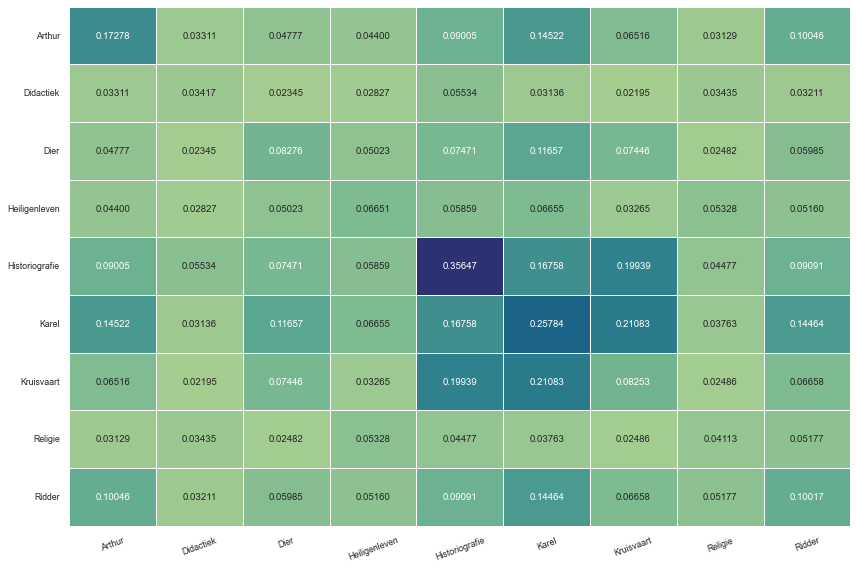

In [144]:
genres = sorted(set(list(intergenre['subgenre1']) + list(intergenre['subgenre2'])))
hits = np.zeros((len(genres), len(genres)))

for _, row in intergenre.iterrows():
    hits[genres.index(row['subgenre1']), genres.index(row['subgenre2'])] = row['hit_ratio'] * 100
    hits[genres.index(row['subgenre2']), genres.index(row['subgenre1'])] = row['hit_ratio'] * 100

hits = pd.DataFrame(hits, index=genres, columns=genres)
fig, ax = plt.subplots(figsize=(12, 8))
sb.set(font_scale=.8)
sb.set_style("whitegrid", {'axes.grid' : False})
ax = sb.heatmap(hits, annot=True, cmap='crest', cbar=False,
                linewidths=1, linecolor='white', fmt='.5f')
ax.tick_params(left=False, bottom=False)
for l in plt.gca().lines:
    l.set_alpha(0.3)
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig(f'../figures/genre_dist.png', dpi=500);